# BME 503 Exploration 1:  Biophysical Models

## Part 1: Classical HH Model

1. Using HodgkinHuxleyOriginalV2.py, implement the classical HH model as described in the handout HodgkinHuxley.pdf. In the classical model, the rest potential is 0.0 mV.

Starting simulation at t=0. s for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=5. ms for a duration of 1. ms
1. ms (100%) simulated in < 1s


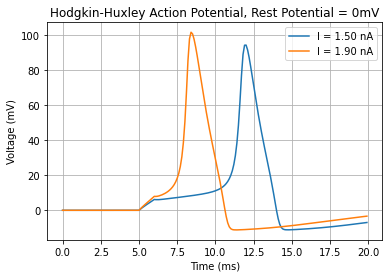

Script took 0.6909983158111572 seconds.


In [3]:
from brian2 import *
import time

start = time.time()
num_neurons = 2

# Parameters
area=20000*umetre**2
Cm = 1*ufarad*cm**-2
El = 10.613*mV
EK = -12.0*mV
ENa = 115.0*mV
E_rest = 0*mV

gl = 0.3*(msiemens)/(cm**2)
gNa = 120.0*(msiemens)/(cm**2)
gK = 36.0*(msiemens)/(cm**2)
defaultclock.dt=.1*ms
div=defaultclock.dt

#The model
eqs_ina = '''
    ina=gNa * m**3 * h * (ENa-(v)) :  amp/meter**2
    
    dm/dt = alpham * (1-m) - betam * m : 1
    dh/dt = alphah * (1-h) - betah * h : 1
    
    alpham = (0.1/mV) * (-v+25.0*mV) / (exp((-v+25.0*mV) / (10.0*mV)) - 1.0) /ms : Hz
    betam = 4.0*exp(-v/(18.0*mV))/ms : Hz
    alphah = 0.07*exp(-v/(20.0*mV))/ms : Hz
    betah = 1.0/(exp((-v+30.0*mV) / (10.0*mV))+1.0)/ms : Hz
    '''

eqs_ik = '''
    ik=gK * n**4 * (EK-v):amp/meter**2
    
    dn/dt = alphan * (1.0-n) - betan * n : 1
    
    alphan = (0.01/mV) * (-v+10.0*mV) / (exp((-v+10.0*mV) / (10.0*mV)) - 1.0)/ms : Hz
    betan = 0.125*exp(-v/(80.0*mV))/ms : Hz
    '''

eqs_il = '''
    il = gl * (El-v) :amp/meter**2
    '''

eqs = '''
    dv/dt = (ina+ik+il +I/area)/Cm :  volt
    I : amp
    '''
eqs += (eqs_ina+eqs_ik+eqs_il)

# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(num_neurons, eqs,clock=Clock(defaultclock.dt),
                    threshold='v > -40*mV',
                    refractory='v > -40*mV',
                    method='exponential_euler')
group.v = 0*mV
group.m=0.0529
group.n=0.3177
group.h=0.596


monitor2=StateMonitor(group,'v',record=True)
group.I = 0*nA
run(5.0*ms,report='text')
group.I[0] = 1.50*nA
group.I[1] = 1.90*nA
run(1*ms, report='text')
group.I = 0*nA
run(14.0*ms)


figure(1)
plot(monitor2.t/ms, monitor2.v[0]/mV) #plot the voltage for neuron 0 (index starts at 0)
plot(monitor2.t/ms, monitor2.v[1]/mV) #plot the voltage for neuron 0 (index starts at 0)
# ylim(-20,120) #set axes limits
# xlim(0,20)
xlabel('Time (ms)')
ylabel('Voltage (mV)')
title('Hodgkin-Huxley Action Potential, Rest Potential = 0mV')

#You can dump your results to a file to visualize separately
savetxt('Vmdata.dat',(monitor2.t/ms, monitor2.v[0]/mV))
#out=np.loadtxt('Vmdata.dat')
#plot(out[0],out[1])
legend(['I = 1.50 nA', 'I = 1.90 nA'])
grid()
show()
print('Script took', time.time()-start, 'seconds.')


2. Change the model so the rest potential is -60.0 mV. You will need to change the rate constants and the Nernst potentials.

Solution: 

    1. Change the rest potential and all channels potentials by -60.0 mV. 
    ```
    E_rest = (0 - 60)*mV
    El = (10.613 - 60)*mV
    EK = (-12.0 - 60)*mV
    ENa = (115.0 - 60)*mV
    ```
    2. Change the ODE. 
    ```
    alpham = (0.1/mV) * (-(v+60*mV)+25.0*mV) / (exp((-(v+60*mV)+25.0*mV) / (10.0*mV)) - 1.0) /ms : Hz
    betam = 4.0*exp(-(v+60*mV)/(18.0*mV))/ms : Hz
    alphah = 0.07*exp(-(v+60*mV)/(20.0*mV))/ms : Hz
    betah = 1.0/(exp((-(v+60*mV)+30.0*mV) / (10.0*mV))+1.0)/ms : Hz
    ```
    3. The initial voltage should be updated to E_rest. The other parameters n,m,h could stay the same as when the rest potential is 0.0 mV.
    

Starting simulation at t=0. s for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=5. ms for a duration of 1. ms
1. ms (100%) simulated in < 1s


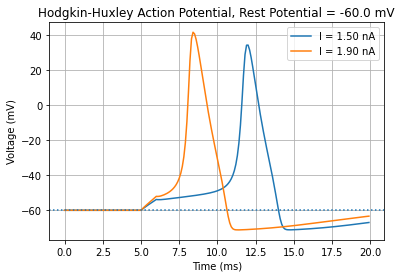

Script took 0.544996976852417 seconds.


In [4]:
from brian2 import *
import time

start = time.time()
num_neurons = 2

# Parameters
area=20000*umetre**2
Cm = 1*ufarad*cm**-2
El = (10.613 - 60)*mV
EK = (-12.0 - 60)*mV
ENa = (115.0 - 60)*mV
# en_var = 1.4
# El = 10.613*mV * en_var
# EK = -12.0*mV * en_var
# ENa = 115.0*mV * en_var
E_rest = (0 - 60)*mV

gl = 0.3*(msiemens)/(cm**2)
gNa = 120.0*(msiemens)/(cm**2)
gK = 36.0*(msiemens)/(cm**2)
defaultclock.dt=.1*ms
div=defaultclock.dt

#The model
eqs_ina = '''
    ina=gNa * m**3 * h * (ENa-(v)) :  amp/meter**2
    
    dm/dt = alpham * (1-m) - betam * m : 1
    dh/dt = alphah * (1-h) - betah * h : 1
    
    alpham = (0.1/mV) * (-(v+60*mV)+25.0*mV) / (exp((-(v+60*mV)+25.0*mV) / (10.0*mV)) - 1.0) /ms : Hz
    betam = 4.0*exp(-(v+60*mV)/(18.0*mV))/ms : Hz
    alphah = 0.07*exp(-(v+60*mV)/(20.0*mV))/ms : Hz
    betah = 1.0/(exp((-(v+60*mV)+30.0*mV) / (10.0*mV))+1.0)/ms : Hz
    '''

eqs_ik = '''
    ik=gK * n**4 * (EK-v):amp/meter**2
    
    dn/dt = alphan * (1.0-n) - betan * n : 1
    
    alphan = (0.01/mV) * (-(v+60*mV)+10.0*mV) / (exp((-(v+60*mV)+10.0*mV) / (10.0*mV)) - 1.0)/ms : Hz
    betan = 0.125*exp(-(v+60*mV)/(80.0*mV))/ms : Hz
    '''

eqs_il = '''
    il = gl * (El-v) :amp/meter**2
    '''

eqs = '''
    dv/dt = (ina+ik+il +I/area)/Cm :  volt
    I : amp
    '''
eqs += (eqs_ina+eqs_ik+eqs_il)

# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(num_neurons, eqs,clock=Clock(defaultclock.dt),
                    threshold='v > -40*mV',
                    refractory='v > -40*mV',
                    method='exponential_euler')
group.v = E_rest
group.m=0.0529
group.n=0.3177
group.h=0.596


# update Nernst potentials
E_rest = -60 * mV

monitor2=StateMonitor(group,'v',record=True)
group.I = 0*nA
run(5.0*ms,report='text')
group.I[0] = 1.50*nA
group.I[1] = 1.90*nA
run(1*ms, report='text')
group.I = 0*nA
run(14.0*ms)

figure(1)
plot(monitor2.t/ms, monitor2.v[0]/mV) #plot the voltage for neuron 0 (index starts at 0)
plot(monitor2.t/ms, monitor2.v[1]/mV) #plot the voltage for neuron 0 (index starts at 0)
axhline(E_rest / mV, ls=":")
# ylim(-20-60,120) #set axes limits
# xlim(0,20)
xlabel('Time (ms)')
ylabel('Voltage (mV)')
title('Hodgkin-Huxley Action Potential, Rest Potential = -60.0 mV')

#You can dump your results to a file to visualize separately
savetxt('Vmdata.dat',(monitor2.t/ms, monitor2.v[0]/mV))
legend(['I = 1.50 nA', 'I = 1.90 nA'])
grid()

#out=np.loadtxt('Vmdata.dat')
#plot(out[0],out[1])
show()
print('Script took', time.time()-start, 'seconds.')

3. After 5msec, apply a 1 msec pulse and determine the threshold current in nA. What is the threshold?

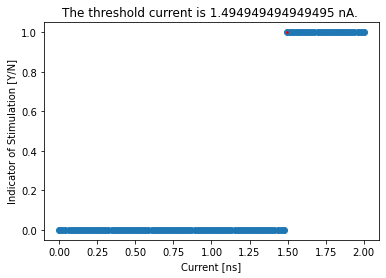

In [2]:
from brian2 import *
import time

start = time.time()
num_neurons = 1

# Parameters
area=20000*umetre**2
Cm = 1*ufarad*cm**-2
El = (10.613 - 60)*mV
EK = (-12.0 - 60)*mV
ENa = (115.0 - 60)*mV
# en_var = 1.4
# El = 10.613*mV * en_var
# EK = -12.0*mV * en_var
# ENa = 115.0*mV * en_var
E_rest = (0 - 60)*mV

gl = 0.3*(msiemens)/(cm**2)
gNa = 120.0*(msiemens)/(cm**2)
gK = 36.0*(msiemens)/(cm**2)
defaultclock.dt=.1*ms
div=defaultclock.dt

#The model
eqs_ina = '''
    ina=gNa * m**3 * h * (ENa-(v)) :  amp/meter**2
    
    dm/dt = alpham * (1-m) - betam * m : 1
    dh/dt = alphah * (1-h) - betah * h : 1
    
    alpham = (0.1/mV) * (-(v+60*mV)+25.0*mV) / (exp((-(v+60*mV)+25.0*mV) / (10.0*mV)) - 1.0) /ms : Hz
    betam = 4.0*exp(-(v+60*mV)/(18.0*mV))/ms : Hz
    alphah = 0.07*exp(-(v+60*mV)/(20.0*mV))/ms : Hz
    betah = 1.0/(exp((-(v+60*mV)+30.0*mV) / (10.0*mV))+1.0)/ms : Hz
    '''

eqs_ik = '''
    ik=gK * n**4 * (EK-v):amp/meter**2
    
    dn/dt = alphan * (1.0-n) - betan * n : 1
    
    alphan = (0.01/mV) * (-(v+60*mV)+10.0*mV) / (exp((-(v+60*mV)+10.0*mV) / (10.0*mV)) - 1.0)/ms : Hz
    betan = 0.125*exp(-(v+60*mV)/(80.0*mV))/ms : Hz
    '''

eqs_il = '''
    il = gl * (El-v) :amp/meter**2
    '''

eqs = '''
    dv/dt = (ina+ik+il +I/area)/Cm :  volt
    I : amp
    '''
eqs += (eqs_ina+eqs_ik+eqs_il)

# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(num_neurons, eqs,clock=Clock(defaultclock.dt),
                    threshold='v > -40*mV',
                    refractory='v > 40*mV',
                    method='exponential_euler')
group.v = E_rest
group.m=0.0529
group.n=0.3177
group.h=0.596


monitor2=StateMonitor(group,'v',record=True)


current_array = np.linspace(0, 2, 100)
peak_bi_indicator = []
for i in current_array:
    group.I = 0*nA
    run(5.0*ms)
    group.I = i*nA
    run(1*ms)
    group.I = 0*nA
    run(14.0*ms)
    peak_bi_indicator.append((monitor2.v[0] > 40*mV).any())

scatter(current_array, peak_bi_indicator)
xlabel("Current [ns]")
ylabel("Indicator of Stimulation [Y/N]")
index_thre = where(peak_bi_indicator)[0][0]
scatter(current_array[index_thre], peak_bi_indicator[index_thre], marker='o', c='red', s=3)
title("The threshold current is {} nA. ".format(current_array[index_thre]))
show()

4. Apply a long (2000 msec or longer) pulse with amplitudes ranging from 0.0 nA to 7nA. What is the firing rate as a function of current amplitude? Use the updates made to your code or modify IF-HodgkinHuxleyOriginal-skel2.py to implement 100 neurons in a group and apply a different current to each cell from 0-99 with the expression group.<br>
I = '(7.0*nA * i) / num_neurons' 
where i denotes the neuron number.

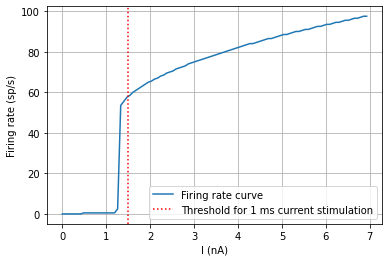

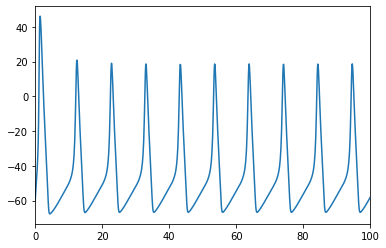

In [7]:
from brian2 import *

num_neurons = 100
duration = 2*second

# Parameters
area=20000*umetre**2
Cm = 1*ufarad*cm**-2
El = (10.613 - 60)*mV
EK = (-12.0 - 60)*mV
ENa = (115.0 - 60)*mV
# en_var = 1.4
# El = 10.613*mV * en_var
# EK = -12.0*mV * en_var
# ENa = 115.0*mV * en_var
E_rest = (0 - 60)*mV

gl = 0.3*(msiemens)/(cm**2)
gNa = 120.0*(msiemens)/(cm**2)
gK = 36.0*(msiemens)/(cm**2)
defaultclock.dt=.1*ms
div=defaultclock.dt

#The model
eqs_ina = '''
    ina=gNa * m**3 * h * (ENa-(v)) :  amp/meter**2
    
    dm/dt = alpham * (1-m) - betam * m : 1
    dh/dt = alphah * (1-h) - betah * h : 1
    
    alpham = (0.1/mV) * (-(v+60*mV)+25.0*mV) / (exp((-(v+60*mV)+25.0*mV) / (10.0*mV)) - 1.0) /ms : Hz
    betam = 4.0*exp(-(v+60*mV)/(18.0*mV))/ms : Hz
    alphah = 0.07*exp(-(v+60*mV)/(20.0*mV))/ms : Hz
    betah = 1.0/(exp((-(v+60*mV)+30.0*mV) / (10.0*mV))+1.0)/ms : Hz
    '''

eqs_ik = '''
    ik=gK * n**4 * (EK-v):amp/meter**2
    
    dn/dt = alphan * (1.0-n) - betan * n : 1
    
    alphan = (0.01/mV) * (-(v+60*mV)+10.0*mV) / (exp((-(v+60*mV)+10.0*mV) / (10.0*mV)) - 1.0)/ms : Hz
    betan = 0.125*exp(-(v+60*mV)/(80.0*mV))/ms : Hz
    '''

eqs_il = '''
    il = gl * (El-v) :amp/meter**2
    '''

eqs = '''
    dv/dt = (ina+ik+il +I/area)/Cm :  volt
    I : amp
    '''
eqs += (eqs_ina+eqs_ik+eqs_il)

# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(num_neurons, eqs,
                    threshold='v > -40*mV',
                    refractory='v > -40*mV',
                    method='exponential_euler')
group.v = E_rest
group.m=0.0529
group.n=0.3177
group.h=0.596



monitor2=StateMonitor(group,'v',record=True)
#group.I = 0*nA
#run(25.0*ms,report='text')
#group.I = 1.7*nA
#run(205.0*ms, report='text')
#group.I = 0*nA
#run(10.0*ms)

group.I = '(7.0*nA * i) / num_neurons'

monitor = SpikeMonitor(group)

run(duration)

figure(1)
plot(group.I/nA, monitor.count / duration)
xlabel('I (nA)')
ylabel('Firing rate (sp/s)')
axvline(current_array[index_thre], ls=":", c='red')
#figure(2)
#ylim(-80,60) #set axes limits
legend(["Firing rate curve", "Threshold for 1 ms current stimulation"])
grid()
show()
plot(monitor2.t/ms, monitor2.v[-1]/mV) #plot the voltage for neuron 0 (index starts at 0)
xlim((0, 100))
show()

In [9]:
print(monitor2.v[-1][-1])
print(monitor2.v[-2][-1])
print(monitor2.v[-3][-1])
print(monitor2.v[-4][-1])
print(monitor2.v[-5][-1])


-30.33391576 mV
-30.44607365 mV
-30.55887042 mV
-30.67232029 mV
-30.78643792 mV


## Part 2: Connor Stevens Model

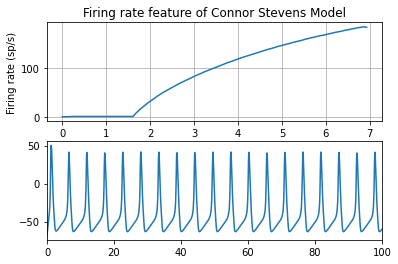

In [11]:
from brian2 import *

num_neurons = 100
duration = 2*second

# Parameters
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2
El = -17.0*mV
EK = -72*mV
ENa = 55.0*mV
EA= -75.0*mV

#gl = 0.3*msiemens/cm**2
#gNa = 120*msiemens/cm**2
#gK = 20.0*msiemens/cm**2
#gA=47.7*msiemens/cm**2

gl = 0.3*msiemens/cm**2
gNa = 120.0*msiemens/cm**2
gK = 20*msiemens/cm**2
gA=  47.7*msiemens/cm**2

#The model
eqs_ina = '''
ina=gNa * m**3 * h * (ENa-v) :  amp/meter**2
dm/dt = alpham * (1-m) - betam * m : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = 0.38/mV*(v+29.7*mV)/(1-exp(-0.1*(v+29.7*mV)/mV ) )/ms : Hz
betam = 15.2*exp(-0.0556*(v+54.7*mV)/mV)/ms : Hz
alphah = 0.266*exp(-0.05*(v+48*mV)/mV)/ms : Hz
betah = 3.8/(1+exp(-0.1*(v+18.*mV)/mV))/ms : Hz
'''




eqs_iA = '''
iA = gA * a**3 * b * (EA-v) :  amp/meter**2
da/dt = (a_inf - a) / tau_a : 1
db/dt = (b_inf - b) / tau_b : 1
a_inf = (0.0761 * exp(0.0314*(v+94.22*mV)/mV) / (1+exp(0.0346*(v+1.17*mV)/mV)))**(1/3) : 1
tau_a = 0.3632*ms + 1.158*ms / (1 + exp(0.0497 * (v + 55.968*mV)/mV)) : second
b_inf = (1 / (1 + exp(0.0688*(v+53.3*mV)/mV)))**4 : 1
tau_b = 1.24*ms + 2.678*ms / (1 + exp(0.0624 * (v + 50*mV)/mV)) : second
'''

eqs_ik = '''
ik=gK * n**4 * (EK-v):amp/meter**2
dn/dt = alphan * (1-n) - betan * n : 1
alphan = (0.02*(v+45.7*mV)/mV)/(1-exp(-0.1*(v+45.7*mV)/mV))/ms : Hz
betan = 0.25*exp(-0.0125*(v+55.7*mV)/mV)/ms : Hz
'''

eqs_il = '''
il = gl * (El-v) :amp/meter**2
'''

eqs = '''
dv/dt = (ina+ik+il+iA+I/area)/Cm:  volt
I : amp
'''
eqs += (eqs_ina+eqs_ik+eqs_il+eqs_iA) 

# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(num_neurons, eqs,
                    threshold='v > 40*mV',
                    refractory='v > 40*mV',
                    method='exponential_euler')
group.v = -68.0*mV
group.m=0.0529
group.n=0.3177
group.h=0.596



monitor2=StateMonitor(group,'v',record=True)
#group.I = 0*nA
#run(25.0*ms,report='text')
#group.I = 1.7*nA
#run(205.0*ms, report='text')
#group.I = 0*nA
#run(10.0*ms)

group.I = '(7.0*nA * i) / num_neurons'

monitor = SpikeMonitor(group)

run(duration)

figure(1)
subplot(2, 1, 1)
plot(group.I/nA, monitor.count / duration)
xlabel('I (nA)')
ylabel('Firing rate (sp/s)')
title('Firing rate feature of Connor Stevens Model')
grid()
subplot(2, 1, 2)
plot(monitor2.t/ms, monitor2.v[-1]/mV) #plot the voltage for neuron 0 (index starts at 0)
#ylim(-80,60) #set axes limits
xlim(0, 100)

show()

## Part 3: Pyramidal Neuron

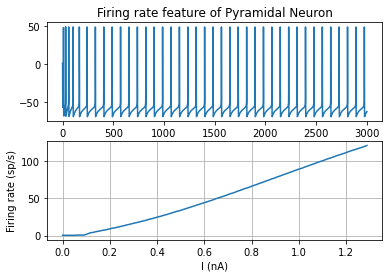

In [8]:
from brian2 import *

num_neurons = 100
duration = 3.0*second

# Parameters
area = 20000*umetre**2
Cm = (1*ufarad*cm**-2)
defaultclock.dt=.02*ms
div=defaultclock.dt


# The model

ENa=50.0 *mV
gnabar=50*msiemens*cm**-2
VT1=-61.5
VT=-61.5
EK=-90.0*mV
gkbar=4.8*msiemens*cm**-2
EKm=-90.0*mV
#
gmbar = 0.15*msiemens*cm**-2
#
glbar= 0.0205*msiemens/cm**2
El=-70*mV


eqs_na = """
ina = gnabar*m**3*h*(ENa-v) : amp/meter**2
dm/dt  = (am1*(1-m)-bm1*m): 1
dh/dt  = (ah1*(1-h)-bh1*h): 1
am1=0.32*(13-(vu-VT))/(exp((13-(vu-VT))/4.0)-1.0)/ms: Hz
bm1=(0.28*((vu-VT)-40)/(exp(((vu-VT)-40)/5.0)-1.0))/ms: Hz
ah1 = 0.128*exp(-(vu-17-VT)/18)/ms: Hz
bh1 = 4/(1+exp(-(vu-40-VT)/5))/ms: Hz
"""

# IM channel ()
# Non-inactivating potassium current 
eqs_m = """
im = gmbar*c*(EKm-v) : amp/meter**2
dc/dt = (c_inf - c) / tau_c : 1
c_inf = 1 / (1 + exp(-(v + 35*mV) / (10*mV))) : 1
tau_c = 1123.5*ms / (3.3 * exp((v+35*mV)/(20*mV)) + exp(-(v + 35*mV) / (20*mV))) : second
"""



# K channel 
eqs_k = """
ik = gkbar*b**4*(EK-v): amp/meter**2
db/dt  = (ab*(1-b)-bb*b): 1
ab=0.032*(vu-15-VT1)/(1.0 - exp(-(vu-15-VT1)/5.0))/ms:Hz
bb=0.5*exp(-(vu-10-VT1)/40)/ms : Hz

"""

# Leak
eqs_leak = """
il = glbar*(El-v) : amp/meter**2
"""



eqs = """
dv/dt = (il + ik+ +ina+ im + I/area)/Cm : volt
vu = v/mV : 1  # unitless v 
I: amp
"""
eqs += eqs_leak + eqs_k + eqs_na +eqs_m


# Threshold and refractoriness are only used for spike counting
P1 = NeuronGroup(num_neurons, eqs,clock=Clock(defaultclock.dt),
                    threshold='v > -40*mV',refractory='v > -40*mV',method='euler')

P1.I='1.3*nA * i / num_neurons'

monitor = SpikeMonitor(P1)
monitor2=StateMonitor(P1, ('v'), record=True)
net = Network(P1, monitor, monitor2)
net.run(duration)

figure(1)

subplot(2,1,1)
title('Firing rate feature of Pyramidal Neuron')

plot(monitor2.t/ms, monitor2.v[20]/mV)
subplot(2,1,2)
#Idata=I(numpy.arange(0,duration/ms,(div/ms))*ms)
#plt.plot((numpy.arange(0,duration/ms,div/ms)),Idata)

plot(P1.I/nA, monitor.count / duration)
xlabel('I (nA)')
ylabel('Firing rate (sp/s)')
grid()
show()

## Part 4: Linear Inegrate and Fire Neuron
Remove the Sodium and Potassium currents from the HH model, leaving just the leakage current. Set EL=-10.0 mV. Compute the I vs Firing rate plot again using

group.I = '(7.0*nA * i) / num_neurons'

Show an example output from neuron 75.

Extra: performance with different refractory time is also explorated. When the refractory time is not zero, there is a saturation firing rate. 

In [1]:
from brian2 import *

num_neurons = 75
duration = 3.0*second
# duration = 0.3*second
# Parameters
area = 20000*umetre**2
Cm = (1*ufarad*cm**-2)
defaultclock.dt=.02*ms
div=defaultclock.dt


# The model
El=-10*mV
E_rest = El.copy()
gl = 0.3*(msiemens)/(cm**2)

# Leak
eqs_leak = """
il = gl * (El-v) :amp/meter**2
"""
eqs = """
dv/dt = (il + I/area)/Cm : volt
I: amp
"""



# Threshold and refractoriness are only used for spike counting
P1 = NeuronGroup(num_neurons, 
                 eqs,
                 clock=Clock(defaultclock.dt),
                 threshold='v > 30*mV',
                 # reset='v = 0*mV',
                 reset='v = E_rest',
                 refractory=0*ms,
                 method='euler')

# group = NeuronGroup(n, eqs, threshold='v > 10*mV', reset='v = 0*mV',
                    # refractory=5*ms, method='exact')        

P1.I='7.0*nA * i / num_neurons'

monitor = SpikeMonitor(P1)
monitor2=StateMonitor(P1, ('v'), record=True)
net = Network(P1, monitor, monitor2)
net.run(duration)

figure(1)
subplot(2,1,1)
plot(monitor2.t/ms, monitor2.v[60]/mV)
axhline(E_rest/mV, ls=':')

subplot(2,1,2)
#Idata=I(numpy.arange(0,duration/ms,(div/ms))*ms)
#plt.plot((numpy.arange(0,duration/ms,div/ms)),Idata)
plot(P1.I/nA, monitor.count / duration)
xlabel('I (nA)')
ylabel('Firing rate (sp/s)')
legend(["Zero refractory time"])
show()

# Threshold and refractoriness are only used for spike counting
P1 = NeuronGroup(num_neurons, 
                 eqs,
                 clock=Clock(defaultclock.dt),
                 threshold='v > 30*mV',
                 # reset='v = 0*mV',
                 reset='v = E_rest',
                 refractory=3*ms,
                 method='euler')

# group = NeuronGroup(n, eqs, threshold='v > 10*mV', reset='v = 0*mV',
                    # refractory=5*ms, method='exact')        

P1.I='7.0*nA * i / num_neurons'

monitor = SpikeMonitor(P1)
monitor2=StateMonitor(P1, ('v'), record=True)
net = Network(P1, monitor, monitor2)
net.run(duration)

figure(1)
subplot(2,1,1)
plot(monitor2.t/ms, monitor2.v[60]/mV)
axhline(E_rest/mV, ls=':')

subplot(2,1,2)
#Idata=I(numpy.arange(0,duration/ms,(div/ms))*ms)
#plt.plot((numpy.arange(0,duration/ms,div/ms)),Idata)
plot(P1.I/nA, monitor.count / duration)
xlabel('I (nA)')
ylabel('Firing rate (sp/s)')
legend(["3ms refractory time"])
show()

# Threshold and refractoriness are only used for spike counting
P1 = NeuronGroup(num_neurons, 
                 eqs,
                 clock=Clock(defaultclock.dt),
                 threshold='v > 30*mV',
                 # reset='v = 0*mV',
                 reset='v = E_rest',
                 refractory=5*ms,
                 method='euler')

# group = NeuronGroup(n, eqs, threshold='v > 10*mV', reset='v = 0*mV',
                    # refractory=5*ms, method='exact')        

P1.I='7.0*nA * i / num_neurons'

monitor = SpikeMonitor(P1)
monitor2=StateMonitor(P1, ('v'), record=True)
net = Network(P1, monitor, monitor2)
net.run(duration)

figure(1)
subplot(2,1,1)
plot(monitor2.t/ms, monitor2.v[60]/mV)
axhline(E_rest/mV, ls=':')

subplot(2,1,2)
#Idata=I(numpy.arange(0,duration/ms,(div/ms))*ms)
#plt.plot((numpy.arange(0,duration/ms,div/ms)),Idata)
plot(P1.I/nA, monitor.count / duration)
xlabel('I (nA)')
ylabel('Firing rate (sp/s)')
legend(["5ms refractory time"])
show()

BrianObjectException: Error encountered with object named 'neurongroup'.
Object was created here (most recent call only, full details in debug log):
  File 'C:\Users\jimmy\AppData\Local\Temp/ipykernel_23492/1361729898.py', line 30, in <module>
    P1 = NeuronGroup(num_neurons,

An error occurred when preparing an object. (See above for original error message and traceback.)

# Extra: Threshold Parameter in Different Nerual Models
For bio and simplified models.

The biological models such as HH model is derived by curve fitting on the experimental data. Therefore, their behavior doesn't need the parameter "threshold" to trigger the pulse. 

Therefore, for the program below of HH model, no matter how we change the threshold, the behavior will always be the same.

Instead, the parameter may play its role in counting the effective pulses. 

Starting simulation at t=0. s for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=5. ms for a duration of 1. ms
1. ms (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=5. ms for a duration of 1. ms
1. ms (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=5. ms for a duration of 1. ms
1. ms (100%) simulated in < 1s


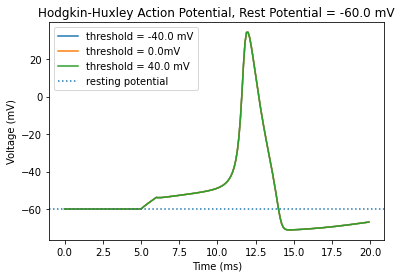

In [19]:
from brian2 import *
import time

start = time.time()
num_neurons = 1

# Parameters
area=20000*umetre**2
Cm = 1*ufarad*cm**-2
El = (10.613 - 60)*mV
EK = (-12.0 - 60)*mV
ENa = (115.0 - 60)*mV
# en_var = 1.4
# El = 10.613*mV * en_var
# EK = -12.0*mV * en_var
# ENa = 115.0*mV * en_var
E_rest = (0 - 60)*mV

gl = 0.3*(msiemens)/(cm**2)
gNa = 120.0*(msiemens)/(cm**2)
gK = 36.0*(msiemens)/(cm**2)
defaultclock.dt=.1*ms
div=defaultclock.dt

#The model
eqs_ina = '''
    ina=gNa * m**3 * h * (ENa-(v)) :  amp/meter**2
    
    dm/dt = alpham * (1-m) - betam * m : 1
    dh/dt = alphah * (1-h) - betah * h : 1
    
    alpham = (0.1/mV) * (-(v+60*mV)+25.0*mV) / (exp((-(v+60*mV)+25.0*mV) / (10.0*mV)) - 1.0) /ms : Hz
    betam = 4.0*exp(-(v+60*mV)/(18.0*mV))/ms : Hz
    alphah = 0.07*exp(-(v+60*mV)/(20.0*mV))/ms : Hz
    betah = 1.0/(exp((-(v+60*mV)+30.0*mV) / (10.0*mV))+1.0)/ms : Hz
    '''

eqs_ik = '''
    ik=gK * n**4 * (EK-v):amp/meter**2
    
    dn/dt = alphan * (1.0-n) - betan * n : 1
    
    alphan = (0.01/mV) * (-(v+60*mV)+10.0*mV) / (exp((-(v+60*mV)+10.0*mV) / (10.0*mV)) - 1.0)/ms : Hz
    betan = 0.125*exp(-(v+60*mV)/(80.0*mV))/ms : Hz
    '''

eqs_il = '''
    il = gl * (El-v) :amp/meter**2
    '''

eqs = '''
    dv/dt = (ina+ik+il +I/area)/Cm :  volt
    I : amp
    '''
eqs += (eqs_ina+eqs_ik+eqs_il)

# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(num_neurons, eqs,clock=Clock(defaultclock.dt),
                    threshold='v > -40*mV',
                    refractory='v > -40*mV',
                    method='exponential_euler')
group.v = E_rest
group.m=0.0529
group.n=0.3177
group.h=0.596

figure(1)

# update Nernst potentials
E_rest = -60 * mV
monitor2=StateMonitor(group,'v',record=True)
group.I = 0*nA
run(5.0*ms,report='text')
group.I[0] = 1.50*nA
run(1*ms, report='text')
group.I = 0*nA
run(14.0*ms)
plot(monitor2.t/ms, monitor2.v[0]/mV) #plot the voltage for neuron 0 (index starts at 0)

group = NeuronGroup(num_neurons, eqs,clock=Clock(defaultclock.dt),
                    threshold='v > 0*mV',
                    refractory='v > -40*mV',
                    method='exponential_euler')
group.v = E_rest
group.m=0.0529
group.n=0.3177
group.h=0.596
monitor2=StateMonitor(group,'v',record=True)
group.I = 0*nA
run(5.0*ms,report='text')
group.I[0] = 1.50*nA
run(1*ms, report='text')
group.I = 0*nA
run(14.0*ms)
plot(monitor2.t/ms, monitor2.v[0]/mV) #plot the voltage for neuron 0 (index starts at 0)
xlabel('Time (ms)')
ylabel('Voltage (mV)')
title('Hodgkin-Huxley Action Potential, Rest Potential = 0mV')

group = NeuronGroup(num_neurons, eqs,clock=Clock(defaultclock.dt),
                    threshold='v > 30*mV',
                    refractory='v > -40*mV',
                    method='exponential_euler')
group.v = E_rest
group.m=0.0529
group.n=0.3177
group.h=0.596
monitor2=StateMonitor(group,'v',record=True)
group.I = 0*nA
run(5.0*ms,report='text')
group.I[0] = 1.50*nA
run(1*ms, report='text')
group.I = 0*nA
run(14.0*ms)
plot(monitor2.t/ms, monitor2.v[0]/mV) #plot the voltage for neuron 0 (index starts at 0)
xlabel('Time (ms)')
ylabel('Voltage (mV)')
title('Hodgkin-Huxley Action Potential, Rest Potential = -60.0 mV')

savetxt('Vmdata.dat',(monitor2.t/ms, monitor2.v[0]/mV))
axhline(E_rest / mV, ls=":")

legend(['threshold = -40.0 mV', 'threshold = 0.0mV', 'threshold = 40.0 mV', 'resting potential'])
show()

However, in simplified models such as LIF model, we will need the parameter "threshold" to trigger the pulse manually. 

In LIF models, different thresholds will give us totally different results. As below, a smaller threshold will lead to a higher firing rate.

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


Starting simulation at t=0. s for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=5. ms for a duration of 1. ms
1. ms (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=5. ms for a duration of 1. ms
1. ms (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=5. ms for a duration of 1. ms
1. ms (100%) simulated in < 1s


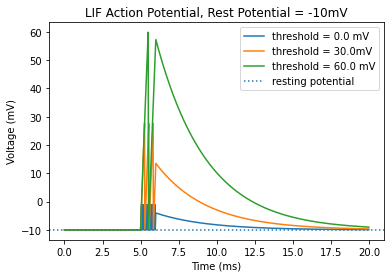

In [1]:
from brian2 import *
import time

start = time.time()
num_neurons = 1

# Parameters
area = 20000*umetre**2
Cm = (1*ufarad*cm**-2)
defaultclock.dt=.02*ms
div=defaultclock.dt


# The model
El=-10*mV
E_rest = El.copy()
gl = 0.3*(msiemens)/(cm**2)

# Leak
eqs_leak = """
il = gl * (El-v) :amp/meter**2
"""
eqs = """
dv/dt = (il + I/area)/Cm : volt
I: amp
"""
eqs += eqs_leak

# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(num_neurons, 
                 eqs,
                 clock=Clock(defaultclock.dt),
                 threshold='v > 0*mV',
                 # reset='v = 0*mV',
                 reset='v = E_rest',
                 refractory=0*ms,
                 method='euler')
group.v = E_rest

figure(1)

# update Nernst potentials
monitor2=StateMonitor(group,'v',record=True)
group.I = 0*nA
run(5.0*ms,report='text')
group.I[0] = 30*nA
run(1*ms, report='text')
group.I = 0*nA
run(14.0*ms)
plot(monitor2.t/ms, monitor2.v[0]/mV) #plot the voltage for neuron 0 (index starts at 0)



group = NeuronGroup(num_neurons, 
                 eqs,
                 clock=Clock(defaultclock.dt),
                 threshold='v > 30*mV',
                 # reset='v = 0*mV',
                 reset='v = E_rest',
                 refractory=0*ms,
                 method='euler')
group.v = E_rest
monitor2=StateMonitor(group,'v',record=True)
group.I = 0*nA
run(5.0*ms,report='text')
group.I[0] = 30*nA
run(1*ms, report='text')
group.I = 0*nA
run(14.0*ms)
plot(monitor2.t/ms, monitor2.v[0]/mV) #plot the voltage for neuron 0 (index starts at 0)
xlabel('Time (ms)')
ylabel('Voltage (mV)')
title('Hodgkin-Huxley Action Potential, Rest Potential = 0mV')

group = NeuronGroup(num_neurons, 
                 eqs,
                 clock=Clock(defaultclock.dt),
                 threshold='v > 60*mV',
                 # reset='v = 0*mV',
                 reset='v = E_rest',
                 refractory=0*ms,
                 method='euler')
group.v = E_rest
monitor2=StateMonitor(group,'v',record=True)
group.I = 0*nA
run(5.0*ms,report='text')
group.I[0] = 30*nA
run(1*ms, report='text')
group.I = 0*nA
run(14.0*ms)
plot(monitor2.t/ms, monitor2.v[0]/mV) #plot the voltage for neuron 0 (index starts at 0)
xlabel('Time (ms)')
ylabel('Voltage (mV)')
title('LIF Action Potential, Rest Potential = -10mV')

savetxt('Vmdata.dat',(monitor2.t/ms, monitor2.v[0]/mV))
axhline(E_rest / mV, ls=":")

legend(['threshold = 0.0 mV', 'threshold = 30.0mV', 'threshold = 60.0 mV', 'resting potential'])
show()